In [1]:
#Cumulative Distribution Function

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris = pd.read_csv("Iris.csv")

In [3]:
df = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']]

In [4]:
iris_setosa = iris.loc[iris["Species"] == "Iris-setosa"] #taking all points corresponding to setosa
iris_virginica = iris.loc[iris["Species"] == "Iris-virginica"] #taking all points corresponding to virginica
iris_versicolor = iris.loc[iris["Species"] == "Iris-versicolor"] #taking all points corresponding to versicolor

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


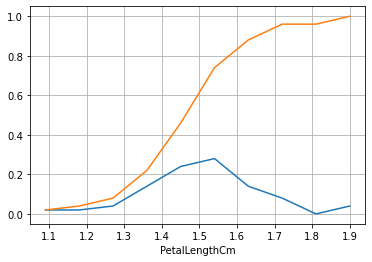

In [8]:
counts, bin_edges = np.histogram(iris_setosa["PetalLengthCm"], bins=10, density=True)

pdf = counts/sum(counts)
# print(counts)
# print(sum(counts))
print(pdf)
print(bin_edges)

#compute cdf
cdf = np.cumsum(pdf) #cumulative sum (cdf)
plt.plot(bin_edges[1:],pdf) #plot pdf
plt.plot(bin_edges[1:],cdf) #plot cdf
plt.grid()
plt.xlabel("PetalLengthCm")
plt.show()

In [8]:
#blue=pdf
#orange=cdf
#x-axis=Petal length of Setosa flowers
#y-axis=Probabilities

#PDF represents probability of how many points are in a given range
#eg 20% of points (setosa flowers) have their PetalLength between 1.5-1.6

#Refer image 9.7

#say when x-axis is 1.6 the CDF value will be close to 0.82, this means
#There are 82% of Setosa flowers(probability of setosa flowers) that have PetalLength <= 1.6
#cant get this info from PDF

#CDF always starts at 0 (left bottom) and ends at 1 (top right)
#100% of Setosa flowers have PetalLength <=1.9
#15% of Setosa flowers have PetalLength <=1.3

#CDF: y-axis: percentage value


In [9]:
#How to build a CDF?

#------------------Method 1- Image 2 ------------------------------------------------
#For 1.6 in x-axis the corresponding CDF=0.82
#For 1.6, how many Setosa flowers have PetalLength <= 1.6
#50 total setosa flowers, 41 have PetalLength < 1.6
# cdf = 41/50 = 0.82 (41 out of 50 flowers have PL < 1.6)
#repeat ths calculation for all x-axis points, to get the cdf curve

#------------------Method 2 Image 3------------------------------------------------
#PDF counts how many flowers are there in each PetalLength, ie histograms for all points
#To get CDF for point 0.82, calculate sum of all the heights of the histograms till 1.6
#ie Cumulative Sum

# for any value x on x-axis, a corresponding y value can be found using Method 1 or 2

#------------------Method 3 Image 4------------------------------------------------
 # For a PDF, the corresponding value of its CDF is the Area Under Curve of PDF till that point on x-axis
 #Diffrentiate CDF -> PDF
 #Integrate PDF -> CDF

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


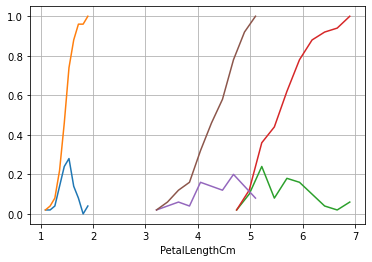

In [9]:
# Plots of CDF of petallength for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.grid()
plt.xlabel("PetalLengthCm")
plt.show();

In [ ]:
#small ones = pdf #blue=setosa, #purple=versicolr, green=virginica
#large ones=cdf

#we can say that PL <= 2 are setosa bcoz 100% of the points have PL < 2: 100% accuracy
# 
# say 5 is the threshold for virginica and versicolr, bcoz thats where both pdfs are intersecting
#for x-axis value=5, the CDF of versicolr is close 0.95, ie 95% of the versicolor flowers have Pl <= 5
#for x-axis value=5, the CDF of virginica is close 0.1 ie 10% of the virginica flowers have Pl <= 5

if PL > 2 and PL <= 5: #95% accuracy
    flower="versicolr"
if PL > 5:
    flower="virginica" #90% accuracy

#these rules will not be correct 100% of the times for versicolr, versicolr
#but it will be correct for versicolr 95% of the times bcoz the CDF value for versicolr is 0.95 for x-axis=5
#ie 95% of the versicolor flowers have PL > 2 and PL < 5
#for virginica, there are 10% (cdf of point 5 for virginica) of points which are less than 5, 10% will be mistaken

#Refer Image 5